In [ ]:
!pip install piexif

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import piexif
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
import json
import random
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/Shared drives/vertani-datasets/GrassDetectionDataset/train'
validation_dir = '/content/drive/Shared drives/vertani-datasets/GrassDetectionDataset/validation'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 244 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.5320 - loss: 1.5666 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.6223 - loss: 0.6098 - val_accuracy: 0.9167 - val_loss: 0.3766
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.7991 - loss: 0.4427 - val_accuracy: 0.8333 - val_loss: 0.2686
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.8337 - loss: 0.3773 - val_accuracy: 0.9167 - val_loss: 0.1794
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.8384 - loss: 0.3533 - val_accuracy: 0.9167 - val_loss: 0.1795
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.8585 - loss: 0.2930 - val_accuracy: 0.9167 - val_loss: 0.1258
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.8228 - loss: 0.4199 - val_accuracy: 0.9167 - val_loss: 0.1424
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.8942 - loss: 0.2897 - val_accuracy: 0.9167 - val_loss: 0.11

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step - accuracy: 1.0000 - loss: 0.0457
Validation accuracy: 1.00


In [ ]:
model.save('/content/drive/Shared drives/vertani-datasets/GrassDetectionDataset/grass_detection_model.h5')

In [ ]:
model_json = model.to_json()
with open('/content/drive/Shared drives/vertani-datasets/grass_detection_model.json', 'w') as file:
    file.write(model_json)

model.save_weights('/content/drive/Shared drives/vertani-datasets/grass_detection_model.weights.h5')

In [ ]:
h5_model_path = '/content/drive/Shared drives/vertani-datasets/GrassDetectionDataset/grass_detection_model.h5'

converter = tf.lite.TFLiteConverter.from_keras_model(tf.keras.models.load_model(h5_model_path))
tflite_model = converter.convert()

tflite_model_path = '/content/drive/Shared drives/vertani-datasets/grass_detection_model.tflite'
with open(tflite_model_path, 'wb') as file:
    file.write(tflite_model)

print(f"TFLite model saved at {tflite_model_path}")

Saved artifact at '/tmp/tmpw3n0lo1i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132206409836752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206409841680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206409869872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206409873392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206410015392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206410013456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206410020144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206410190864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206410191216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132206410190160: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model save

In [ ]:
# !pip install tflite-support


In [ ]:
# from tflite_support import metadata as _metadata
# from tflite_support.metadata_writers import image_classifier
# # Path to the TFLite model file and labels file
# labels_file_path = '/content/drive/Shared drives/vertani-datasets/labels.txt'

# # Create metadata for the TFLite model
# metadata_writer = image_classifier.MetadataWriter.create_for_inference(
#     tflite_model_path=tflite_model_path,
#     label_file_path=labels_file_path
# )

# # Save the model with metadata
# metadata_writer.write_metadata('/content/drive/Shared drives/vertani-datasets/grass_detection_model_with_metadata.tflite')
# print("TFLite model with metadata saved!")


In [ ]:
# h5_model_path = '/content/drive/Shared drives/vertani-datasets/GrassDetectionDataset/grass_detection_model.h5'

# tflite_model_path = '/content/drive/Shared drives/vertani-datasets/grass_detection_model.tflite'

# converter = tf.lite.TFLiteConverter.from_keras_model(tf.keras.models.load_model(h5_model_path))
# tflite_model = converter.convert()

# with open(tflite_model_path, 'wb') as file:
#     file.write(tflite_model)

In [ ]:
model = tf.keras.models.load_model('/content/drive/Shared drives/vertani-datasets/GrassDetectionDataset/grass_detection_model.h5')

In [ ]:
img_path = '/content/drive/Shared drives/vertani-datasets/test/Pmetadata.jpg'
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
prediction = model.predict(img_array)
print(prediction)
if prediction > 0.5:
    print("Grass Detected!")
else:
    print("No Grass Detected!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.99998105]]
Grass Detected!


Percentage of grass area: 0.12%


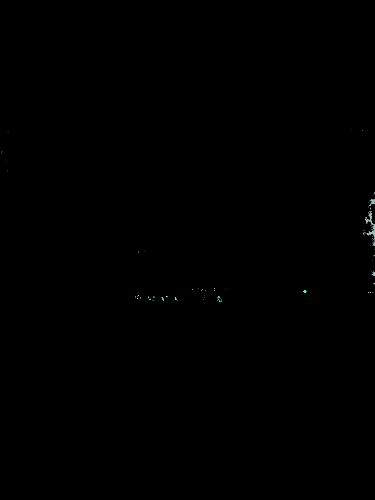

In [ ]:
original_img = cv2.imread(img_path)

hsv_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2HSV)

lower_bound = np.array([35, 50, 50])
upper_bound = np.array([85, 255, 255])

grass_mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
grass_area = cv2.bitwise_and(original_img, original_img, mask=grass_mask)

grass_pixel_count = cv2.countNonZero(grass_mask)
total_pixel_count = grass_mask.size
grass_percentage = round((grass_pixel_count / total_pixel_count) * 100, 2)
print(f"Percentage of grass area: {grass_percentage:.2f}%")

max_width = 500
max_height = 500

height, width = original_img.shape[:2]

if width > max_width or height > max_height:
    aspect_ratio = width / height
    if aspect_ratio > 1:
        new_width = max_width
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = max_height
        new_width = int(new_height * aspect_ratio)
    resized_img = cv2.resize(grass_area, (new_width, new_height))
else:
    resized_img = grass_area

cv2_imshow(resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def get_lat_long(img_path):
    try:
        image = Image.open(img_path)
        exif_data = image._getexif()

        if exif_data is not None:
            gps_info = None
            for tag, value in exif_data.items():
                if TAGS.get(tag) == 'GPSInfo':
                    gps_info = value
                    break

            if gps_info is not None:
                gps_data = {}
                for key in gps_info:
                    if key in GPSTAGS:
                        gps_data[GPSTAGS[key]] = gps_info[key]

                latitude = None
                longitude = None

                if 'GPSLatitude' in gps_data and 'GPSLatitudeRef' in gps_data:
                    lat = gps_data['GPSLatitude']
                    lat_ref = gps_data['GPSLatitudeRef']
                    latitude = convert_to_degrees(lat)
                    if lat_ref != 'N':
                        latitude = -latitude

                if 'GPSLongitude' in gps_data and 'GPSLongitudeRef' in gps_data:
                    lon = gps_data['GPSLongitude']
                    lon_ref = gps_data['GPSLongitudeRef']
                    longitude = convert_to_degrees(lon)
                    if lon_ref != 'E':
                        longitude = -longitude

                return latitude, longitude
            else:
                print("GPSInfo not found in the metadata.")
        else:
            print("No EXIF data found.")
    except Exception as e:
        print(f"Error: {e}")

    return None, None

def convert_to_degrees(value):
    """Convert the GPS coordinates to degrees."""
    d = value[0]
    m = value[1]
    s = value[2]
    return d + (m / 60.0) + (s / 3600.0)

latitude, longitude = get_lat_long(img_path)
if latitude is not None and longitude is not None:
    print(f'Latitude: {latitude}, Longitude: {longitude}')
else:
    print('Latitude and Longitude data not available')

Latitude: -7.023602777777778, Longitude: 107.54797777777777


In [ ]:
import requests

def get_elevation(lat, lon):
    url = f"https://api.open-meteo.com/v1/elevation?latitude={lat}&longitude={lon}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        elevation = data["elevation"][0]
        return elevation
    except requests.exceptions.RequestException as req_err:
        print(f"HTTP Request error: {req_err}")
    except KeyError:
        print("Error parsing response: 'elevation' key not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    return None

elevation = get_elevation(latitude, longitude)
if elevation is not None:
    print(f"Elevasi lokasi Anda: {elevation} meter")
else:
    print("Gagal mendapatkan elevasi lokasi.")


Elevasi lokasi Anda: 671.0 meter


In [ ]:
dataset_path = '/content/drive/Shared drives/vertani-datasets/PlantRecomendationDatasets/new_vegetables_v2.csv'
image_folder = '/content/drive/Shared drives/vertani-datasets/PlantRecomendationDatasets/Plant-images'

In [ ]:
def recommend_plants(grass_percentage, elevation, dataset_path, image_folder):
    data = pd.read_csv(dataset_path)

    if grass_percentage < 5:
        return "Error: The plantable area is not enough. Please retake the picture."

    if 5 <= grass_percentage < 20:
        filtered_plants = data[data['max_ukuran'] < 1]
    elif 20 <= grass_percentage < 50:
        filtered_plants = data[data['max_ukuran'] < 2]
    else:
        filtered_plants = data

    filtered_plants = filtered_plants[
        (filtered_plants['min_mdpl'] <= elevation) &
        (filtered_plants['max_mdpl'] >= elevation)
    ]

    if filtered_plants.empty:
        return "Error: Currently, there is no plant that fits your data. Please ask the app developer to improve the datasets."

    if len(filtered_plants) > 4:
        filtered_plants = filtered_plants.sample(n=4, random_state=random.randint(0, 1000))

    print(f"Based on the photo you uploaded, you have a plantable area of {grass_percentage}% and an altitude of {elevation} MDPL.\n")
    print("Here are our plant recommendations that can fit your circumstances:\n")

    for _, row in filtered_plants.iterrows():
        plant_name = row['nama_sayuran']
        description = row['penjelasan']
        image_path = os.path.join(image_folder, f"{plant_name}.jpg")

        print(f"- {plant_name}")
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print("(Image not available)")
        print(f"{description}\n")

recommend_plants(grass_percentage, elevation, dataset_path, image_folder)

'Error: The plantable area is not enough. Please retake the picture.'